<a href="https://colab.research.google.com/github/PosgradoMNA/Actividades_Aprendizaje-A01794023-Andres_Palacios/blob/main/Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reduccion de dimensiones

Asignatura: Ciencia y Analitica de datos

Nombre: Jaime Andres Palacios Campaña

Matricula: A01794023

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [30]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = W @ D @ Winv
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [63]:
#Matriz 1

# define la matriz
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("---------Matriz original---------")
print(A1)
print("---------------------------------")

# Se calcula la eigendescomposición
values1, vectors1 = eig(A1)
print("-------Eigendescomposición-------")
print(values1) #D
print(vectors1) #W
print("---------------------------------")

#Se reconstruyen
values1, vectors1 = np.linalg.eig(A1)
W1 = vectors1
Winv1 = np.linalg.inv(W1)
D1 = np.diag(values1)
B1 = W1 @ D1 @ Winv1
print("-------Matriz reconstruida-------")
print(B1)
print("---------------------------------")

---------Matriz original---------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
---------------------------------
-------Eigendescomposición-------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
---------------------------------
-------Matriz reconstruida-------
[[ 3.00000000e+00+1.12272023e-16j  3.36536354e-16-9.67833078e-17j
   2.00000000e+00-3.95053829e-17j]
 [ 3.00000000e+00-1.66253281e-16j  9.99200722e-16+1.12958209e-16j
  -2.00000000e+00+2.77350775e-17j]
 [ 1.11022302e-16+1.03283117e-18j  1.00000000e+00-7.61630485e-17j
   1.00000000e+00+1.02438275e-16j]]
---------------------------------


In [71]:
#Matriz 2

# define la matriz
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------")

# Se calcula la eigendescomposición
values2, vectors2 = eig(A2)
print("-------Eigendescomposición-------")
print(values2) #D
print(vectors2) #W
print("---------------------------------")

#Se reconstruyen
values2, vectors2 = np.linalg.eig(A2)
W2 = vectors2
Winv2 = np.linalg.inv(W2)
D2 = np.diag(values2)
B2 = W2 @ D2 @ Winv2
print("-------Matriz reconstruida-------")
print(B2)
print("---------------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
-------Eigendescomposición-------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
---------------------------------
-------Matriz reconstruida-------
[[1.00000000e+00 3.00000000e+00 8.00000000e+00]
 [2.00000000e+00 7.41483138e-17 7.08397389e-16]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
---------------------------------


In [28]:
#Matriz 3

# define la matriz
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A3)
print("-----------------------------")

# Se calcula la eigendescomposición
values3, vectors3 = eig(A3)
print("-------Eigendescomposición-------")
print(values3) #D
print(vectors3) #W
print("---------------------------------")

#Se reconstruyen
values3, vectors3 = np.linalg.eig(A3)
W3 = vectors3
Winv3 = np.linalg.inv(W3)
D3 = np.diag(values3)
B3 = W3 @ D3 @  Winv3
print("-------Matriz reconstruida-------")
print(B3)
print("---------------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
-------Eigendescomposición-------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
---------------------------------
-------Matriz reconstruida-------
[[ 5.00000000e+00  4.00000000e+00 -1.53912019e-15]
 [ 1.00000000e+00 -1.30389602e-15  1.00000000e+00]
 [ 1.00000000e+01  7.00000000e+00  1.00000000e+00]]
---------------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


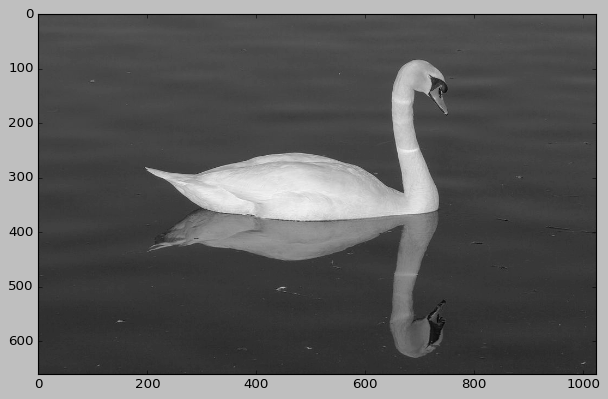

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FEDD2AEC610>


In [7]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [8]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [9]:
U.shape

(660, 660)

In [10]:
V.shape

(1024, 1024)

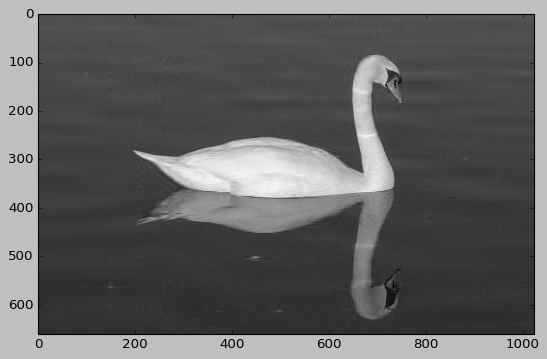

Felicidades la imagen está comprimida


In [11]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

*Imagen 1:*



[212. 215. 217. ... 127. 120. 120.]
<PIL.Image.Image image mode=LA size=682x1023 at 0x7FEDCD1F0890>


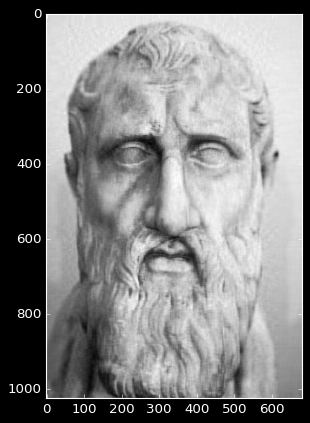

In [12]:
#imagen 1

plt.style.use('dark_background')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/10/Zenon_de_Citio.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
print(img)

U,D,V = np.linalg.svd(imgmat)
imgmat.shape
#iremos de 0-682, siendo 682 como normalmente están los datos
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()

*Imagen 2:*

[ 7.  9. 11. ...  8.  8.  8.]
<PIL.Image.Image image mode=LA size=1200x800 at 0x7FEDC8D56450>


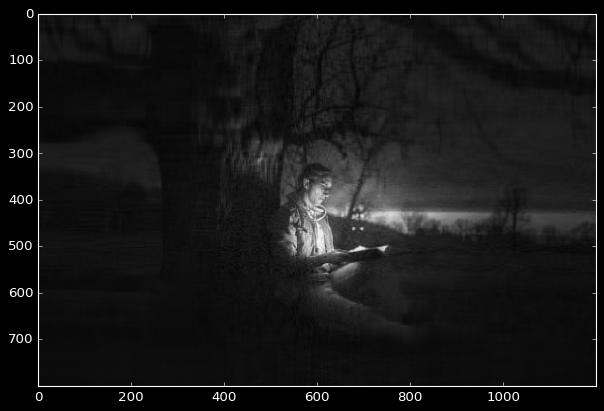

In [13]:
#imagen 2
plt.style.use('dark_background')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/09/sabiduria.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
print(img)

U,D,V = np.linalg.svd(imgmat)
imgmat.shape
#iremos de 0-1200, siendo 1200 como normalmente están los datos
nvalue = 40
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()

*Imagen 3:*

[194. 206. 203. ... 201. 200. 196.]
<PIL.Image.Image image mode=LA size=540x760 at 0x7FEDC8C71D10>


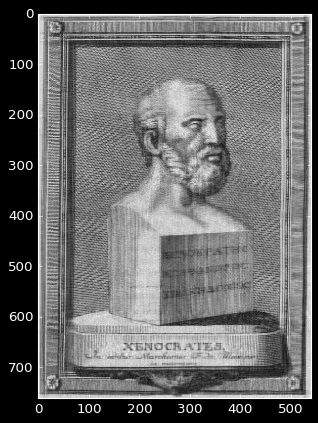

In [14]:
#imagen 3

plt.style.use('dark_background')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2021/12/Xenocrates.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
print(img)

U,D,V = np.linalg.svd(imgmat)
imgmat.shape
#iremos de 0-540, siendo 540 como normalmente están los datos
nvalue = 80
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




El análisis de componentes principales (PCA) es una conocida técnica de reducción de dimensionalidad no supervisada que construye características/variables relevantes a través de combinaciones lineales (PCA lineal) o no lineales (PCA kernel) de las variables originales (características).

La construcción de características relevantes se logra mediante la transformación lineal de variables correlacionadas en un número menor de variables no correlacionadas . Esto se hace proyectando (producto escalar) los datos originales en el espacio PCA reducido utilizando los vectores propios de la matriz de covarianza/correlación, también conocida como los componentes principales (PC).

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

# Cargar los datos
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Z-score de las características 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# El modelo PCA
pca = PCA(n_components=2) # se estima sólo 2 PCs
X_new = pca.fit_transform(X) # Se proyecta la data original dentro de el espacio PCA 

Se grafica los datos antes y después de la transformación de PCA y se codifica con colores cada punto (muestra) usando la clase correspondiente de la flor (y) .

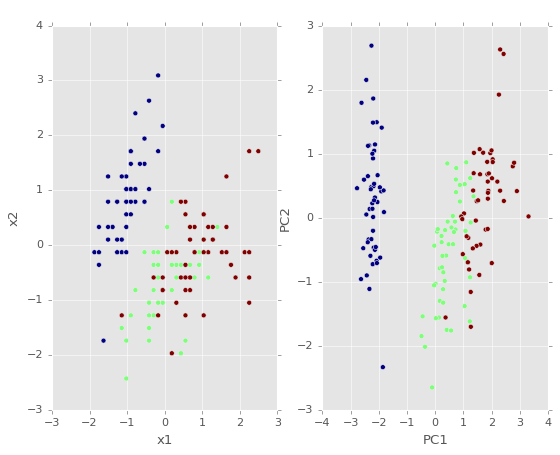

[0.72962445 0.22850762]


In [16]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

print(pca.explained_variance_ratio_)

Podemos ver que en el espacio PCA, la varianza se maximiza a lo largo de PC1 (explica el 73 % de la varianza) y PC2 (explica el 22 % de la varianza. Juntos, explican el 95%.

La prueba de máxima varianza también se puede ver estimando la matriz de covarianza del espacio reducido:

In [17]:
print('Matriz de covarianza del espacio reducido:')
print(np.cov(X_new.T))
print('----------------------------------')
print('Valores propios reales de la covarianza almacenada:')
print(pca.explained_variance_)

Matriz de covarianza del espacio reducido:
[[2.93808505e+00 5.33928780e-16]
 [5.33928780e-16 9.20164904e-01]]
----------------------------------
Valores propios reales de la covarianza almacenada:
[2.93808505 0.9201649 ]


Observamos que estos valores (en la diagonal tenemos las varianzas) son iguales a los valores propios reales de la covarianza almacenada en:

*pca.explained_variance_*

La importancia de cada característica se refleja en la magnitud de los valores correspondientes en los vectores propios (mayor magnitud, mayor importancia).



In [18]:
#Encontremos las características más importantes:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


Aquí, pca.components_tiene forma [n_components, n_features] Por lo tanto, mirando el PC1 (primer Componente Principal) que es la primera fila.

Podemos concluir que las características 1, 3 y 4 son las más importantes para PC1. De manera similar, podemos afirmar que la función 2 y luego la 1 son las más importantes para PC2. Para resumir, nos fijamos en los valores absolutos de los componentes de los vectores propios correspondientes a los k valores propios más grandes. En sklearn los componentes se ordenan por varianza explicada. Cuanto mayores son estos valores absolutos, más contribuye una característica específica a ese componente principal.

In [19]:
#El biplot es la mejor manera de visualizar todo en uno después de un análisis PCA

def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

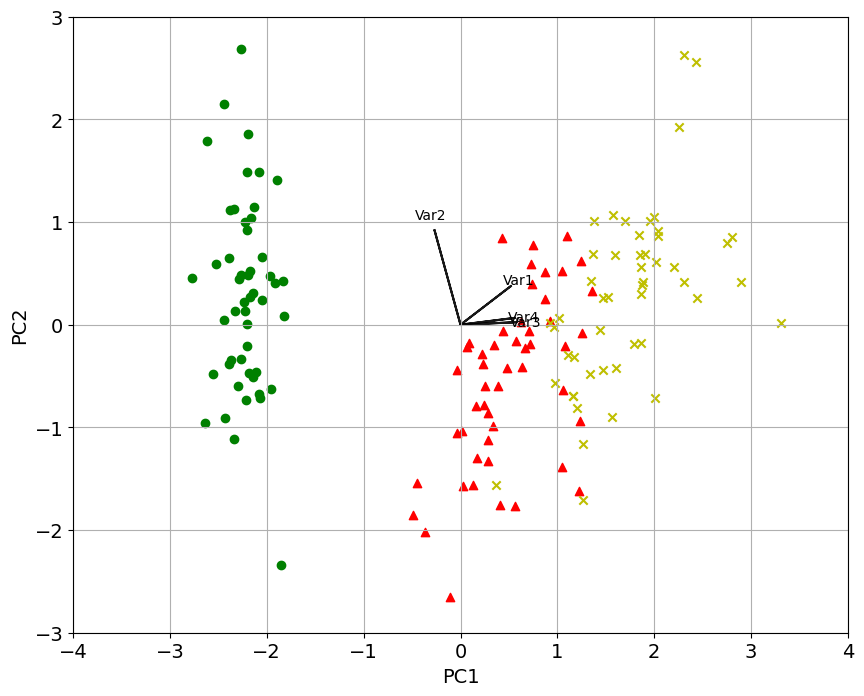

In [20]:
#Llamamos a la función

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Describe lo relevante del ejercicio y que descubriste de las variables

De nuevo podemos verificar visualmente que **a) la varianza está maximizada** y **b) que las características 1, 3 y 4 son las más importantes para PC1.** De manera similar, la característica 2 y luego la 1 son las más importantes para PC2. Además, las flechas (variables/características) que apuntan en la misma dirección indican correlación entre las variables que representan, mientras que las flechas que apuntan en direcciones opuestas indican un contraste entre las variables que representan.

Con respecto al analisis de PCA, es interesante observar como graficamente los datos nos muestran su comportamiento mediante los vectores y como su trayectoria en un plano, se traduce en como algunos componentes tienen una relacion directa o indirecta, mayor o menor que otros con respecto a la varianza de las variables.